# Week 2 Individual Assignment

For this assignment, I am exploring a shapefile data of Transit Oriented Districts in Los Angeles County. This dataset is from Los Angeles County Department of Regional Planning.

For my file is in shapefile, and pandas cannot read shapefiles, so I import geopandas library.

In [3]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Then I read and add shapefile to notebook

In [4]:
tod=gpd.read_file('Transit_Oriented_District_(TOD).zip')

To observe the size of my data, I have to use.shape function to see how many rows and columns it has. By the looks of it, the data is not that big.

In [5]:
tod.shape

(11, 5)

Now I want a more detailed look at the dataframe, so I use .info fuction to see the information for each row and column.

In [6]:
tod.info

<bound method DataFrame.info of     OBJECTID                                    NAME  \
0          7                                 SLAUSON   
1          8                                FLORENCE   
2          9                               FIRESTONE   
3         12                               HAWTHORNE   
4         13                        AVIATION / I-105   
5         14                            SIERRA MADRE   
6         15                                 DEL AMO   
7         17                3RD STREET SPECIFIC PLAN   
8         20           WILLOWBROOK TOD SPECIFIC PLAN   
9         21           WEST CARSON TOD SPECIFIC PLAN   
10        22  CONNECT SOUTHWEST LA TOD SPECIFIC PLAN   

                                       FULL_NAME    LINE  \
0                          TOD:  SLAUSON STATION    BLUE   
1                         TOD:  FLORENCE STATION    BLUE   
2                        TOD:  FIRESTONE STATION    BLUE   
3                        TOD:  HAWTHORNE STATION   GREE

The shapefile I imported to python is a geodataframe.

In [7]:
type(tod)

geopandas.geodataframe.GeoDataFrame

I'm using .head() function to take a look at the first five rows of the data.

In [8]:
tod.head()

,OBJECTID,NAME,FULL_NAME,LINE,geometry
0,7,SLAUSON,TOD: SLAUSON STATION,BLUE,"POLYGON ((6487899.500 1821188.750, 6487982.425..."
1,8,FLORENCE,TOD: FLORENCE STATION,BLUE,"POLYGON ((6487925.000 1815903.250, 6488007.924..."
2,9,FIRESTONE,TOD: FIRESTONE STATION,BLUE,"POLYGON ((6487901.500 1810601.625, 6487984.425..."
3,12,HAWTHORNE,TOD: HAWTHORNE STATION,GREEN,"POLYGON ((6454786.500 1801028.375, 6454869.424..."
4,13,AVIATION / I-105,TOD: AVIATION STATION,GREEN,"POLYGON ((6446875.000 1799785.750, 6446957.925..."


Then I'm going to use .tail() to look at the last five rows. From the info function, I already know there are 11 rows, and the last 5 is from 6 to 10.

In [9]:
tod.tail()

,OBJECTID,NAME,FULL_NAME,LINE,geometry
6,15,DEL AMO,TOD: DEL AMO STATION,BLUE,"POLYGON ((6497637.417 1769735.227, 6497720.342..."
7,17,3RD STREET SPECIFIC PLAN,TOD: THIRD STREET SPECIFIC PLAN,GOLD,"POLYGON ((6503649.967 1837362.185, 6503708.952..."
8,20,WILLOWBROOK TOD SPECIFIC PLAN,TOD: WILLOWBROOK SPECIFIC PLAN,BLUE,"POLYGON ((6492250.572 1794324.277, 6492295.494..."
9,21,WEST CARSON TOD SPECIFIC PLAN,TOD: WEST CARSON,SILVER,"POLYGON ((6474457.139 1758563.102, 6474161.930..."
10,22,CONNECT SOUTHWEST LA TOD SPECIFIC PLAN,TOD: CONNECT SOUTHWEST LA TOD SPECIFIC PLAN,GREEN,"POLYGON ((6469661.538 1799047.032, 6469784.916..."


I use tod.dtypes to see the datatypes of each row, and most of them are objects, which are a mixed of numbers and strings. There is also a geometry data, which is in GIS.

In [10]:
tod.dtypes

OBJECTID        int64
NAME           object
FULL_NAME      object
LINE           object
geometry     geometry
dtype: object

More information from row 0 to 10. From the non-null count column we see that all 11 rows of data have values in them.

In [11]:
tod.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   11 non-null     int64   
 1   NAME       11 non-null     object  
 2   FULL_NAME  11 non-null     object  
 3   LINE       11 non-null     object  
 4   geometry   11 non-null     geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 568.0+ bytes


Now I want to put all the columns into a list, and we see that the list consists of 5 variables.

In [12]:
tod.columns.to_list()

['OBJECTID', 'NAME', 'FULL_NAME', 'LINE', 'geometry']

Now I want to specifically look at the Line column, to later see how many transit oriented districts are in each line and then later graph a bar plot.

Let's see the first 5 samples of line column.

In [13]:
tod.LINE.sample(5)

6      BLUE
10    GREEN
3     GREEN
4     GREEN
0      BLUE
Name: LINE, dtype: object

words

I use .value_counts() function to count TODs according to each line.

In [14]:
tod.LINE.value_counts()

BLUE      5
GREEN     3
GOLD      2
SILVER    1
Name: LINE, dtype: int64

Save it as a new variable, tod_line

In [15]:
tod_line=tod.LINE.value_counts()

present tod_line to see the new dataset

In [16]:
tod_line

BLUE      5
GREEN     3
GOLD      2
SILVER    1
Name: LINE, dtype: int64

The type of tod_line is a series.

In [17]:
type(tod_line)

pandas.core.series.Series

I want to convert this line data into a dataframe for graphing later.

In [18]:
tod_line = tod_line.reset_index()
tod_line

,index,LINE
0,BLUE,5
1,GREEN,3
2,GOLD,2
3,SILVER,1


In [19]:
type(tod_line)

pandas.core.frame.DataFrame

The result transformed from series to dataframe.

We see that the column names of the dataframe is messed up, it should be LINE above blue, green, gold...

I use columns.to_list() function to list the columns I have at the moment.

In [20]:
tod_line.columns.to_list()

['index', 'LINE']

I then change the columns to line and count.

In [21]:
tod_line.columns=['line','count']

In [22]:
tod_line

,line,count
0,BLUE,5
1,GREEN,3
2,GOLD,2
3,SILVER,1


In order to visualize the outcome, I use .plot() function to plot this dataframe.

<AxesSubplot:>

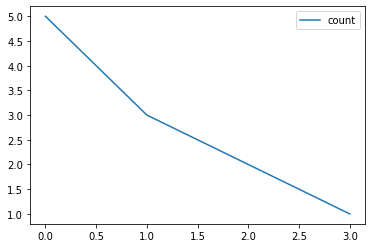

In [23]:
tod_line.plot()

We see a line graph, but let's add additional lables for x and y axis and also a title.

<AxesSubplot:title={'center':'Number of Transit Oriented Districts per metro line'}, xlabel='line'>

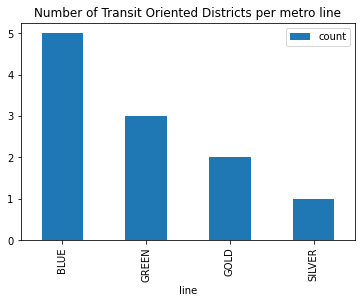

In [24]:
tod_line.plot.bar(x='line',y='count',title='Number of Transit Oriented Districts per metro line')

From the above bar graph, we see that blue line has the most TODs whereas silver line has the least.

If I think the original data has too many columns, and some are not useful, I can trim it to smaller dataset.

In [25]:
## use the .info() function to remind me what are the columns
tod.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   11 non-null     int64   
 1   NAME       11 non-null     object  
 2   FULL_NAME  11 non-null     object  
 3   LINE       11 non-null     object  
 4   geometry   11 non-null     geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 568.0+ bytes


I don't want 'project ID' and 'full name' these two columns, because ID doesn't mean anything right now and full name is repetitive with name. To remove these two columns, I'm going to create a new dataframe with my desired columns.

In [26]:
tod[['NAME','LINE','geometry']]

,NAME,LINE,geometry
0,SLAUSON,BLUE,"POLYGON ((6487899.500 1821188.750, 6487982.425..."
1,FLORENCE,BLUE,"POLYGON ((6487925.000 1815903.250, 6488007.924..."
2,FIRESTONE,BLUE,"POLYGON ((6487901.500 1810601.625, 6487984.425..."
3,HAWTHORNE,GREEN,"POLYGON ((6454786.500 1801028.375, 6454869.424..."
4,AVIATION / I-105,GREEN,"POLYGON ((6446875.000 1799785.750, 6446957.925..."
5,SIERRA MADRE,GOLD,"POLYGON ((6537085.133 1878803.042, 6537168.058..."
6,DEL AMO,BLUE,"POLYGON ((6497637.417 1769735.227, 6497720.342..."
7,3RD STREET SPECIFIC PLAN,GOLD,"POLYGON ((6503649.967 1837362.185, 6503708.952..."
8,WILLOWBROOK TOD SPECIFIC PLAN,BLUE,"POLYGON ((6492250.572 1794324.277, 6492295.494..."
9,WEST CARSON TOD SPECIFIC PLAN,SILVER,"POLYGON ((6474457.139 1758563.102, 6474161.930..."


I'm going to declare this dataframe as tod_new. First thing is to save the desired columns.

In [27]:
desired_columns=['NAME','LINE','geometry']

In [28]:
tod_new=tod[desired_columns].copy()

Print out tod_new.

In [29]:
tod_new

,NAME,LINE,geometry
0,SLAUSON,BLUE,"POLYGON ((6487899.500 1821188.750, 6487982.425..."
1,FLORENCE,BLUE,"POLYGON ((6487925.000 1815903.250, 6488007.924..."
2,FIRESTONE,BLUE,"POLYGON ((6487901.500 1810601.625, 6487984.425..."
3,HAWTHORNE,GREEN,"POLYGON ((6454786.500 1801028.375, 6454869.424..."
4,AVIATION / I-105,GREEN,"POLYGON ((6446875.000 1799785.750, 6446957.925..."
5,SIERRA MADRE,GOLD,"POLYGON ((6537085.133 1878803.042, 6537168.058..."
6,DEL AMO,BLUE,"POLYGON ((6497637.417 1769735.227, 6497720.342..."
7,3RD STREET SPECIFIC PLAN,GOLD,"POLYGON ((6503649.967 1837362.185, 6503708.952..."
8,WILLOWBROOK TOD SPECIFIC PLAN,BLUE,"POLYGON ((6492250.572 1794324.277, 6492295.494..."
9,WEST CARSON TOD SPECIFIC PLAN,SILVER,"POLYGON ((6474457.139 1758563.102, 6474161.930..."


We see the result that the dataframe has the only three columns I want.

Next is to use the query function to only see a subset of the data and create a new table for it. For this data, I want to only see the blue line.

In [30]:
tod_new.query("LINE == 'BLUE'")

,NAME,LINE,geometry
0,SLAUSON,BLUE,"POLYGON ((6487899.500 1821188.750, 6487982.425..."
1,FLORENCE,BLUE,"POLYGON ((6487925.000 1815903.250, 6488007.924..."
2,FIRESTONE,BLUE,"POLYGON ((6487901.500 1810601.625, 6487984.425..."
6,DEL AMO,BLUE,"POLYGON ((6497637.417 1769735.227, 6497720.342..."
8,WILLOWBROOK TOD SPECIFIC PLAN,BLUE,"POLYGON ((6492250.572 1794324.277, 6492295.494..."


There are a total of 5 data.

<AxesSubplot:>

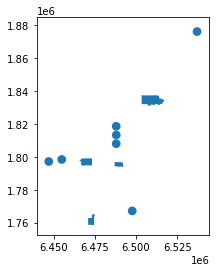

In [31]:
tod_new.plot()

From this output we see the locations of these TODs from the geometry column.

Let's try to make this plot nicer to look at with colorcoded stations.

<AxesSubplot:>

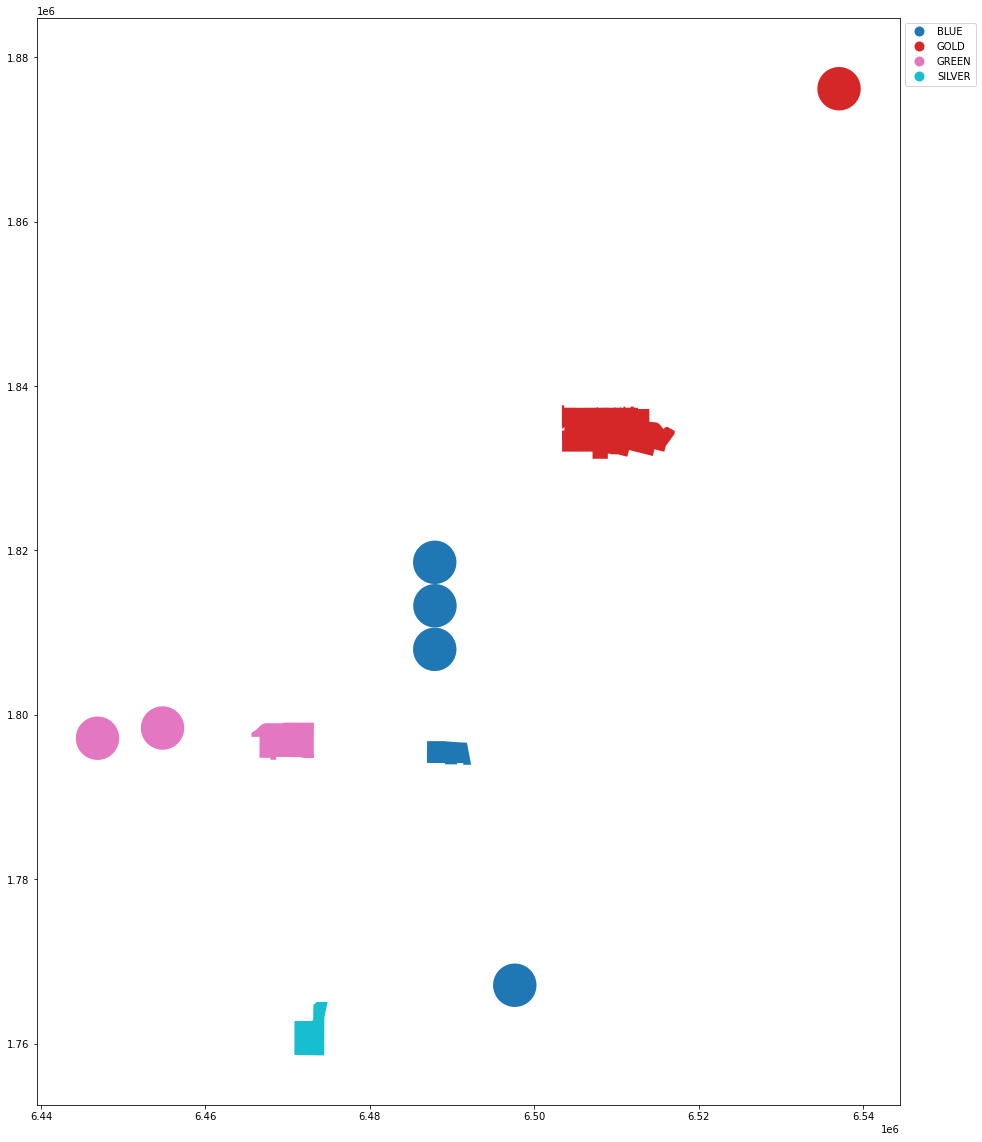

In [35]:
tod_new.plot(
            figsize=(20,20),   
            column = 'LINE',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper left',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

We see the color of these districts is different according to each metro line. Figsize is the size of this plot; column indicates which colum would define the color of the dots/shapes. I also added a legend, and located on the outside of the plot.